Author: Amelia Xie

Dates: 10/10/22, 19/10/22, 23/10/22

10/10/22

# Sub-question

What are the trends across different times of day for each week?

Let's load in the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH = '../../../datasets/Modified_dataset07.csv' 
p7 = pd.read_csv(PATH)
p7_copy = p7.copy() #make a copy of the data

I want to see the trends in step counts over different times of days over a week. First, I will create 4 bins to categorise the hours into intervals. 

Note the following: 

    * "night" represents the period between the hours between 0 to 5 inclusive
    * "morning" represents the period between the hours between 6 to 11 inclusive
    * "afternoon" represents the period between the hours between 12 to 17 inclusive
    * "evening" represents the period between the hours between 18 to 23 inclusive

In [2]:
p7_copy["time of day"] = pd.qcut(p7_copy["hour"], 4, labels = ["night", "morning", "afternoon", "evening"])

This plot shows the frequency of step counts for each hour of each day of the week

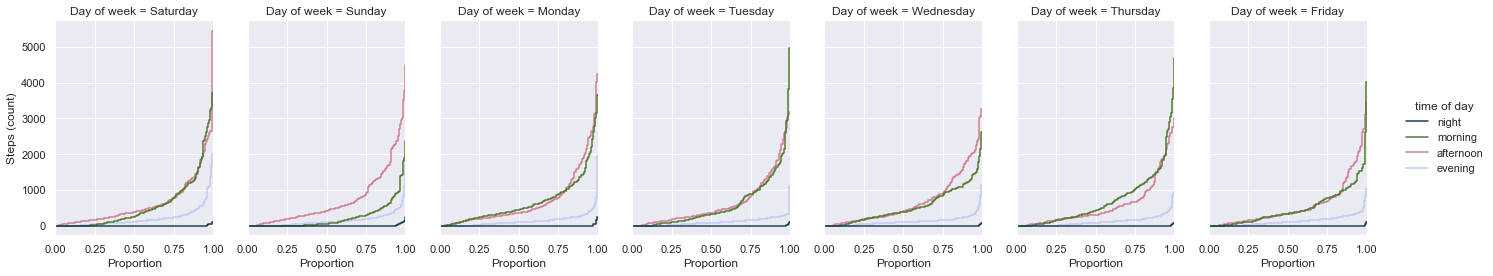

In [3]:
# 19/10/22
sns.set(style="darkgrid") 
plot = sns.displot(
    data=p7_copy, y="Steps (count)", hue="time of day", col='Day of week',
    kind="ecdf", height=4, aspect=.7, palette="cubehelix"
)

Plotting the distribution of step counts across each day. 

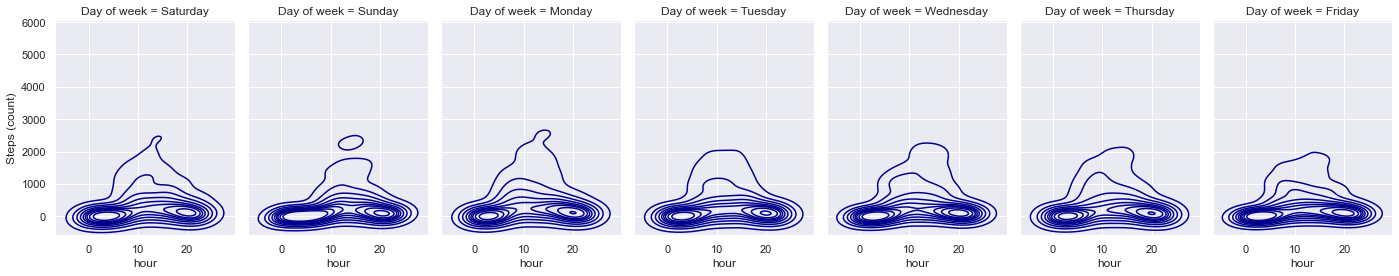

In [4]:
# 19/10/22
plot = sns.displot(
    data=p7, y="Steps (count)", col='Day of week',
    x = "hour", kind = 'kde', height=4, aspect = .7, color = 'darkblue'
)

From the plots we can see that this participant tends to have a fairly normal distribution of steps. On weekdays, the participant tends to walk a greater amount of steps in the mornings, whereas on weekends, the participant tends to have a higher step count in the late afternoon.

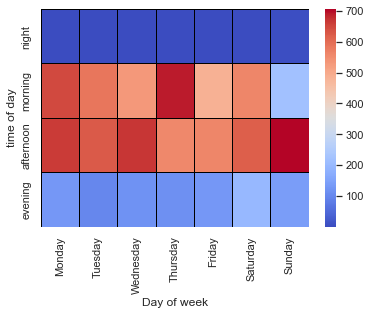

In [5]:
# code taken from Emily's TPP09 notebook
# obtain the mean step counts for each hour of each day of the week
hour_dow_count = p7_copy.groupby(["time of day",'Day of week']).agg({'Steps (count)': 'mean'}).reset_index()
# change the format such that each cell contains a step count value
hour_dow_count = hour_dow_count.pivot("time of day", "Day of week", "Steps (count)")
# change the order of the days of the week
hour_dow_count = hour_dow_count.reindex(
    columns = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'])
# plot the heatmap
hmap = sns.heatmap(hour_dow_count, cmap="coolwarm", linewidths=.5, linecolor = 'black')

The highest step count was recorded for 7 am on Thursday. The step counts appear to generally be unpredictable, meaning this participant may not physically go out of their way to exercise.

## References
* pandas.DataFrame.sort_values — pandas 1.5.0 documentation. Pandas. (2022). Retrieved 10 October 2022, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html.
* 5 ways to apply an IF condition in Pandas DataFrame - Data to Fish. Data to Fish. (2022). Retrieved 10 October 2022, from https://datatofish.com/if-condition-in-pandas-dataframe/.
* https://seaborn.pydata.org/generated/seaborn.displot.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html